# importing the libraries

In [128]:
import cv2
import imutils
import sys
import pandas as pd
import matplotlib.pyplot as plt
import easyocr as ocr

### importing the image and resizing

In [129]:
image = cv2.imread('plate3.png')
image = imutils.resize(image, width=500)


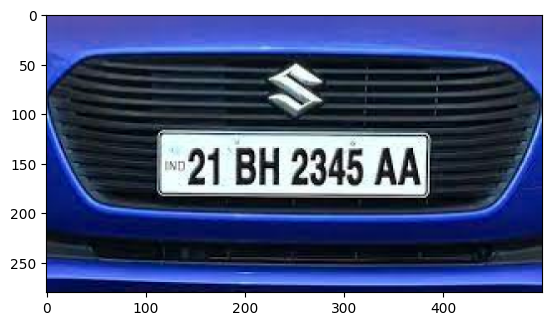

In [130]:
plt.imshow(image)

### grapScalling it

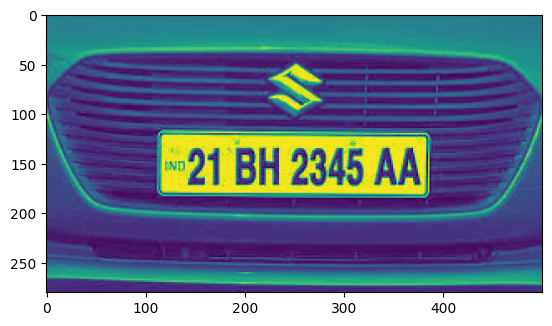

In [131]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

Bilateral Filter

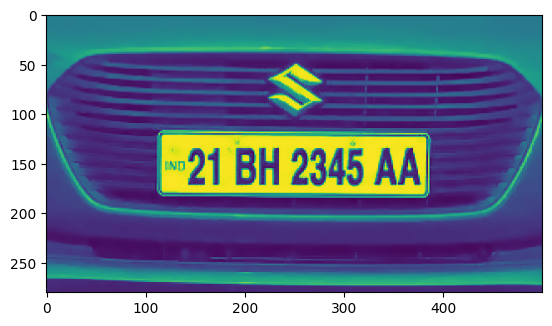

In [132]:
Bil = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(Bil)

### Down grading int white and black pixels

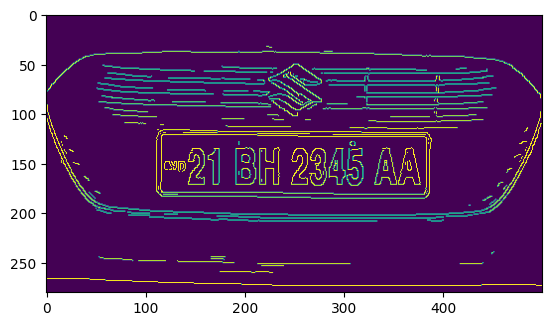

In [133]:
edged = cv2.Canny(Bil, 170, 200)
plt.imshow(edged)

### contoring the img, and selecting the largest one

In [134]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
NumberPlateCnt = None 


finding the appropriate length of contour using the Ramer-Douglas-Peucker algorithm with an accuracy of 2% of the contour perimeter.

In [135]:
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break

If the approximation has exactly four vertices, it is assumed to be a license plate and its contour is stored in the NumberPlateCnt variable.

In [136]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask=mask)

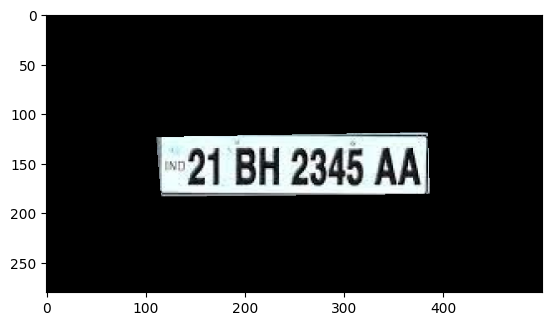

In [137]:
plt.imshow(new_image)

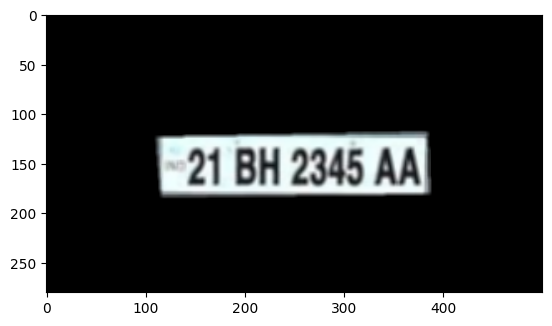

In [138]:
blurred_img = cv2.blur(new_image, (5, 5))
plt.imshow(blurred_img)

### using easyOCR


In [139]:
reader=ocr.Reader(["en"])
result1=reader.readtext(blurred_img)
result1

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[134, 126], [386, 126], [386, 180], [134, 180]],
  '21 BH 2345 AAI',
  0.3165515165411112)]

In [140]:
result2=reader.readtext(new_image)
result2

[([[119, 145], [143, 145], [143, 161], [119, 161]], 'Nn', 0.3053053037274948),
 ([[134, 128], [386, 128], [386, 180], [134, 180]],
  '21 BH 2345 AAL',
  0.5546808651844449)]

### storing it in a dataset

In [141]:

df = pd.DataFrame(result1, columns=['position', 'numberplate', 'accurecy'])
df



,position,numberplate,accurecy
0,"[[134, 126], [386, 126], [386, 180], [134, 180]]",21 BH 2345 AAI,0.316552


In [143]:
df.to_csv('output2.csv', index=False)